In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Telcom_Churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4610,2889-FPWRM,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.80,8684.8,Yes
3018,4176-RELJR,Male,1,No,No,67,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.10,1672.15,No
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
1984,4373-MAVJG,Female,0,Yes,Yes,14,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),90.90,1259,Yes
6507,5708-EVONK,Female,0,Yes,Yes,58,Yes,Yes,Fiber optic,Yes,...,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),93.40,5435.6,Yes


In [3]:
df.drop(['customerID'], axis = 'columns', inplace = True)

In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
pd.to_numeric(df.TotalCharges, errors = 'coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [10]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()].shape

(11, 20)

In [13]:
df.iloc[488]['TotalCharges']

' '

In [14]:
df1 = df[df.TotalCharges != ' ']
df1.shape

(7032, 20)

In [20]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [19]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges) #to change dtype of TotalCharges to float64

Text(0.5, 1.0, 'Customer Churn based on Tenure')

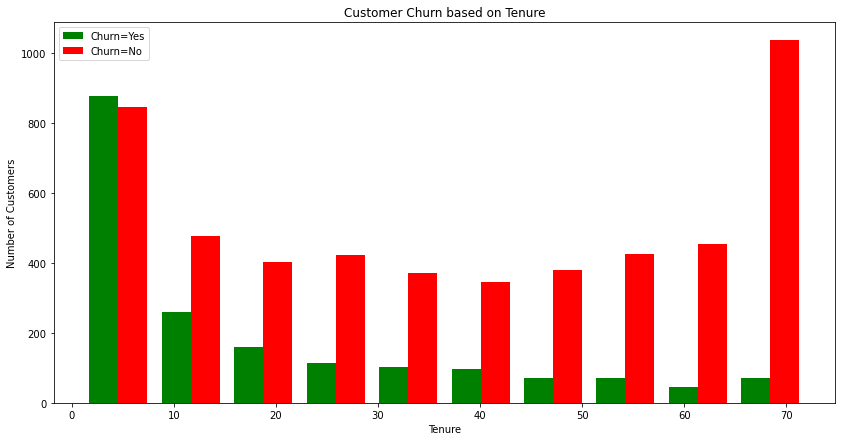

In [40]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

plt.figure(figsize = (14,7))
plt.hist([tenure_churn_yes, tenure_churn_no], color = ['green', 'red'], label = ['Churn=Yes', 'Churn=No'])
plt.legend()
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn based on Tenure')

Text(0.5, 1.0, 'Customer Churn based on Monthly Charges')

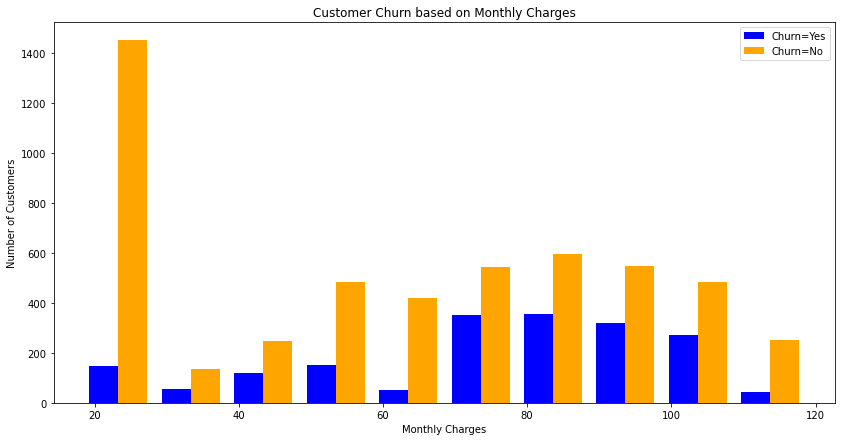

In [42]:
mc_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

plt.figure(figsize = (14,7))
plt.hist([mc_churn_yes, mc_churn_no], color = ['blue', 'orange'], label = ['Churn=Yes', 'Churn=No'])
plt.legend()
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn based on Monthly Charges')

In [49]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtype == 'object':
            print(f'{column}:{df[column].unique()}')

In [50]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [52]:
df1.replace('No internet service', 'No', inplace = True)
df1.replace('No phone service', 'No', inplace = True)

In [53]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [54]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1, 'No': 0}, inplace = True)

C:\Users\ADMIN\Anaconda3\lib\site-packages\pandas\core\series.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [56]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [57]:
df1.gender.replace({'Female': 1, 'Male': 0}, inplace = True)

In [58]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [59]:
df2 = pd.get_dummies(data = df1, columns = ['InternetService','Contract', 'PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [60]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [61]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [62]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [63]:
X = df2.drop(['Churn'], axis = 'columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [65]:
X_train.shape

(5625, 26)

In [66]:
X_test.shape

(1407, 26)

In [70]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([keras.layers.Dense(26, input_shape = (26,), activation = 'relu'),
                         keras.layers.Dense(15, activation = 'relu'),
                         keras.layers.Dense(1, activation = 'sigmoid')])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
176/176 [==============================] - 1s 4ms/step - loss: 0.5126 - accuracy: 0.7492
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4272 - accuracy: 0.7970
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4201 - accuracy: 0.8012
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4155 - accuracy: 0.8059
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4142 - accuracy: 0.8046
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4124 - accuracy: 0.8068
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4101 - accuracy: 0.8050
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4089 - accuracy: 0.8078
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4063 - accuracy: 0.8084
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4056 - accura

176/176 [==============================] - 0s 2ms/step - loss: 0.3540 - accuracy: 0.8336
Epoch 81/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3538 - accuracy: 0.8350
Epoch 82/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3546 - accuracy: 0.8315
Epoch 83/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3535 - accuracy: 0.8359
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3511 - accuracy: 0.8364
Epoch 85/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3524 - accuracy: 0.8386
Epoch 86/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3501 - accuracy: 0.8340
Epoch 87/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3508 - accuracy: 0.8372
Epoch 88/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3505 - accuracy: 0.8388
Epoch 89/100
176/176 [==============================] - ETA: 0s - loss: 0.3505 - accuracy: 0.83

In [73]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 4ms/step - loss: 0.4929 - accuracy: 0.7740


[0.4929041862487793, 0.7739872336387634]

In [74]:
yp = model.predict(X_test)
yp[:5]

array([[0.21528712],
       [0.6434027 ],
       [0.00499198],
       [0.85753596],
       [0.43690836]], dtype=float32)

In [75]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [76]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [77]:
y_pred[:10]

[0, 1, 0, 1, 0, 1, 0, 0, 0, 0]

In [78]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [79]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       999
           1       0.63      0.52      0.57       408

    accuracy                           0.77      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.76      0.77      0.77      1407



Text(69.0, 0.5, 'True')

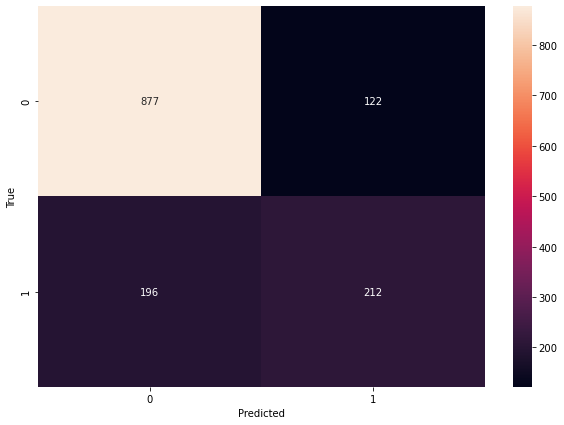

In [82]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True')

In [84]:
#Accuracy
round((877+212)/(877+212+196+122), 2)

0.77

In [85]:
#Precision for class 0
round((877)/(877+196), 2)

0.82

In [86]:
#Precision for class 1
round((212)/(212+122), 2)

0.63

In [87]:
#Recall for class 0
round((877)/(877+122), 2)

0.88

In [88]:
#Recall for class 1
round((212)/(212+196), 2)

0.52